In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Constante do Endereço dos dados
#ENDERECO_DADOS = 'https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv'
ENDERECO_DADOS = r'./dados/BaseDPEvolucaoMensalCisp.csv'

# obter dados do CSV e do MySQL
try:
    print('Obtendo dados de ocorrências...')

    df_ocorrencias = pd.read_csv(ENDERECO_DADOS, sep=';', encoding='iso-8859-1')

    # filtrar ano de 2021 a 2023
    # df_ocorrencias = df_ocorrencias[(df_ocorrencias['ano'] >= 2020) & (df_ocorrencias['ano'] <= 2023)]

    # delimitar somente as variáveis necessárias
    df_veiculos = df_ocorrencias[['cisp','roubo_veiculo','recuperacao_veiculos']]

    #totalizar
    df_total_veiculos = df_veiculos.groupby('cisp').sum(['roub_veiculo','recuperacao_veiculos']).reset_index()

    print(df_total_veiculos)

    print('Dados obtidos com sucesso!')
except Exception as e:
    print('Erro ao obter dados: ', e)

Obtendo dados de ocorrências...
     cisp  roubo_veiculo  recuperacao_veiculos
0       1            548                   527
1       4           2133                  1872
2       5           1253                  1513
3       6           4332                  7768
4       7           1970                  1778
..    ...            ...                   ...
133   159            279                   322
134   165            500                   621
135   166            965                  1444
136   167            104                   386
137   168             59                   159

[138 rows x 3 columns]
Dados obtidos com sucesso!


In [2]:
# realizar a análise a correlação
try:
    print('Analisando dados...')
    
    #calcular a correlação com pandas
    #correlacao = df_total_veiculos['roubo_veiculo'].corr(df_total_veiculos['recuperacao_veiculos'])
    
    # exluir os 10% maiores do dataframe
    '''df_total_veiculos_cut = df_total_veiculos[
        df_total_veiculos['roubo_veiculo'] < np.percentile(df_total_veiculos['roubo_veiculo'], 92)
        ]
    df_total_veiculos_cut = df_total_veiculos_cut[
        df_total_veiculos_cut['recuperacao_veiculos'] < np.percentile(df_total_veiculos_cut['recuperacao_veiculos'], 87)
        ]'''
   
    # calcular a correlação com numpy
    array_roubo_veiculo = np.array(df_total_veiculos['roubo_veiculo'])
    array_recuperacao_veiculos = np.array(df_total_veiculos['recuperacao_veiculos'])

    correlacao = np.corrcoef(array_roubo_veiculo, array_recuperacao_veiculos)[0,1]
    
    print('Correlação: ', correlacao)

except Exception as e:
    print('Erro ao analisar dados: ', e)

Analisando dados...
Correlação:  0.9305805299331201


In [3]:
# regressão linear
# Prever recuperações de veículos com base nos roubos de veículos
try:
    print('Iniciando regressão linear...')

    # importar a classe de regressão linear
    # pip install scikit-learn
    # scikit-learn é uma biblioteca de aprendizado de máquina para python
    # ela é muito utilizada para criar modelos de regressão linear

    # linearrergression é a classe que usaremos para criar o modelo de regressão linear
    from sklearn.linear_model import LinearRegression

    # importar a classe de treino e teste
    # para dividir os dados em treino e teste
    from sklearn.model_selection import train_test_split

    # dividir os dados de treino e teste
    # train_test_split divide os dados de forma aleatória
    # Então, toda vez que rodarmos o código, teremos um resultado diferente
    # Isso não é bom, pois queremos resultados consistentes
    # Para isso, usamos o parâmetro random_state
    # random_state é que sempre teremos os mesmos resultados, 
    # ou seja, o modelo será treinado e testado sempre nos mesmos dados
    # o que é importante para avaliar a qualidade do modelo
    X_train, X_test, y_train, y_test = train_test_split(
                array_roubo_veiculo, # variável independente. Variável que usaremos para prever
                array_recuperacao_veiculos, # variável dependente. Variável que queremos prever
                test_size=0.2, # tamanho do conjunto de teste, logo, 80% para treino
                random_state=42 # O número 42 é usado, pois
                 # é famoso porque foi popularizado no livro "O Guia do Mochileiro das Galáxias", 
                 # onde é descrito como "a resposta para a vida, o universo e tudo mais".
                )
    
    # Normalizar os dados (opcional, mas recomendado)
    # StandardScaler é uma classe que usaremos para normalizar os dados
    # normalizar os dados significa colocá-los em uma escala comum
    # isso é importante porque o modelo de regressão linear é sensível à escala dos dados
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()

    # o standardscarlar espera que os dados da variável independete estejam no formato de matriz, 
    # então precisamos transformar o array em de X em uma matriz
    # o standerscaler é somente na variável independente, onde o treino e teste são feitos
    # Vamos usar o reshape(-1, 1), que vai trasnformar o array em uma matriz com uma coluna 
    # (pq só tem uma variável independente) Regressão linear simples. Só tem 1 variável independente
    # -1 todas as linhas e  o 1 é o número de colunas que queremos que os dados tenham

    # Em treino
    # usa-se o fit_transform, calculando a média e o desvio padrão, para
    # trasformar os dados de treinamento com base nessas estatísticas, 
    # ou seja, padroniza-os para que o dados tenham uma média  próxima de 0 
    # e desvio padrão próximo de 1. Logo os dados estarão na mesma escala
    X_train = scaler.fit_transform(X_train.reshape(-1, 1)) 

    # Em teste
    # O scaler já foi ajustado aos dados de treinamento.
    # Agora, usa-se o transform, no qual você aplica a mesma transformação 
    # aos dados de teste, usando a média e o desvio padrão dos dados de treinamento, 
    # sem recalcular esses valores.
    X_test = scaler.transform(X_test.reshape(-1, 1)) 

    # Criando o Modelo linear
    # o modelo de regressão linear é um modelo que tenta encontrar a relação entre duas variáveis
    # é o y = ax + b

    # Aplicar a transformação de raiz quadrada na variável dependente
    modelo = LinearRegression()

    # Treinando o modelo
    # dados de treino
    # treinar o modelo é o mesmo que encontrar a equação da reta que melhor se ajusta aos dados
    # essa equação é chamada de modelo
    # o modelo é a representação da relação entre as variáveis
    # o método fit treina o modelo e recebe como parâmetros os dados de treino (X e y)
    # o modelo tentará encontrar a relação entre os dados de treino (X e y)
    # Lembrando que X_train está normalizado!
    # por que x tem que ser um array bidimensional e y um array unidimensional?
    # o método fit espera que x seja um array bidimensional e y um array unidimensional
    # x é bidimensional porque pode haver mais de uma variável independente
    # y é unidimensional porque só pode haver uma variável dependente
    modelo.fit(X_train, y_train)

    # Verificar a qualidade do treino
    # dados de teste
    # o r2 score é uma medida de avaliação do modelo
    # chamada de coeficiente de determinação
    # ele varia entre 0 e 1
    # O R² é uma métrica que indica a proporção da variabilidade 
    # dos dados que é explicada pelo modelo.
    # Vai de 0 a 1, sendo que um valor de 1 significa que o modelo 
    # explica 100% da variação nos dados, 
    # e um valor de 0 significa que o modelo não explica 
    # nada da variação nos dados, ou seja, não é confiável.    
    r2_score = modelo.score(X_test, y_test)

    # array com os dados de roubos de veículos para prever a recuperação
    array_roubo_veiculo_pred = np.array([400000, 500000, 600000])

    # normalizar os dados de previsão
    # o scaler já foi ajustado aos dados de treinamento.
    # agora, usa-se o transform, no qual você aplica a mesma transformação
    # aos dados de previsão, usando a média e o desvio padrão dos dados de treinamento,
    # sem recalcular esses valores.
    array_roubo_veiculo_pred_scaled = scaler.transform(array_roubo_veiculo_pred.reshape(-1, 1))

    # prever a recuperação de veículos
    recup_pred = modelo.predict(array_roubo_veiculo_pred_scaled)

    print('Score: ', r2_score)
    print('Previsão de recuperação de veículos: ', recup_pred)

except Exception as e:
    print('Erro ao realizar regressão linear: ', e)

Iniciando regressão linear...
Score:  0.8784527330939058
Previsão de recuperação de veículos:  [283049.9846101  353752.00454394 424454.02447778]


Plotando gráfico para observar a aderência do modelo...


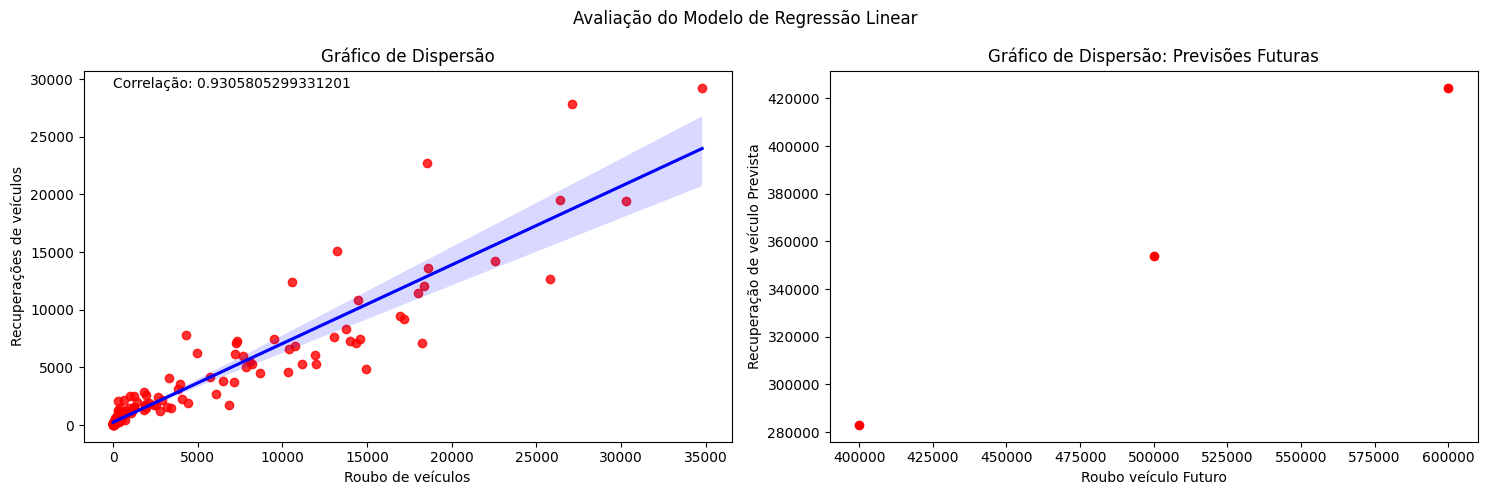

In [4]:
# plotar gráfico
try:
    print('Plotando gráfico para observar a aderência do modelo...')

    plt.subplots(1,2,figsize=(15,5))  # Cria uma figura com 1 linhas e 2 colunas
    plt.suptitle('Avaliação do Modelo de Regressão Linear') 

    # posição 1: Gráfico de Dispersão entre os arrays
    # array_hom_dolosos e array_cvli
    plt.subplot(1, 2, 1)  # Cria um subplot na posição 1

    # seaborn
    import seaborn as sns

    sns.regplot(x=array_roubo_veiculo, y=array_recuperacao_veiculos, color='red',line_kws={'color':'blue'})
    plt.title('Gráfico de Dispersão')
    plt.xlabel('Roubo de veículos')
    plt.ylabel('Recuperações de veículos')

    # adicionar correlação no gráfico
    plt.text(min(array_roubo_veiculo),max(array_recuperacao_veiculos),f'Correlação: {correlacao}', fontsize=10)

    # Posição 2: Gráfico previsões futuras
    plt.subplot(1, 2, 2) 

    # Gráfico de dispersão das previsões futuras
    plt.scatter(array_roubo_veiculo_pred, recup_pred, color='red', label='Previsões Futuras')

    plt.title('Gráfico de Dispersão: Previsões Futuras')
    plt.xlabel('Roubo veículo Futuro')
    plt.ylabel('Recuperação de veículo Prevista')

    plt.tight_layout()  # Ajusta o layout do gráfico  
    plt.show()  # Exibe o gráfico

except Exception as e:
    print('Erro ao plotar gráfico: ', e)
